In [1]:
# Get the dataset
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
# Define the model architecture
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.4982 - acc: 0.7682 - val_loss: 0.3998 - val_acc: 0.8286
Epoch 2/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.2974 - acc: 0.8834 - val_loss: 0.3124 - val_acc: 0.8654
Epoch 3/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.2395 - acc: 0.9093 - val_loss: 0.2839 - val_acc: 0.8804
Epoch 4/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.2016 - acc: 0.9240 - val_loss: 0.3131 - val_acc: 0.8744
Epoch 5/10
20000/20000 [==============================] - 122s 6ms/step - loss: 0.1739 - acc: 0.9358 - val_loss: 0.3244 - val_acc: 0.8872
Epoch 6/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.1617 - acc: 0.9425 - val_loss: 0.3641 - val_acc: 0.8372
Epoch 

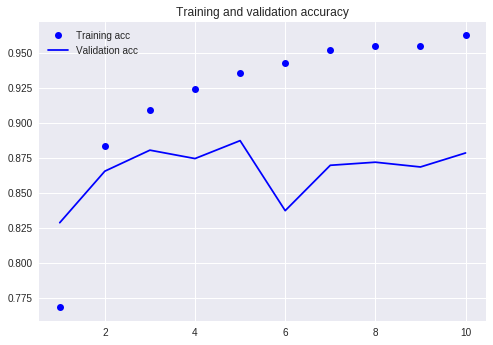

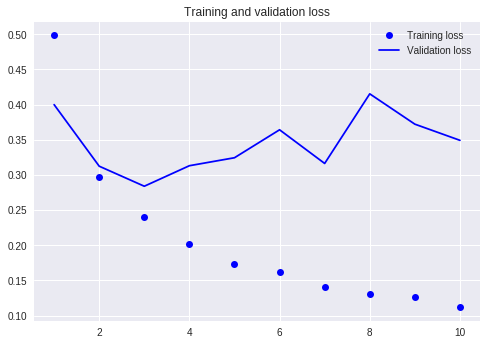

In [3]:
# Plotting the graphs
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
# Perform on Test
results = model.evaluate(input_test, y_test)

25000/25000 [==============================] - 78s 3ms/step


In [5]:
print(results)

[0.39413622656822206, 0.8654]
